**What is Feature Selection?**
 
        Feature selection is the process of choosing the most important features (variables) from a dataset to improve a machine learning model's performance and efficiency. Instead of using all the features, we select only the most relevant ones that contribute significantly to predictions.

**Why Do We Need Feature Selection?**
 
*1.Reduces Overfitting 📉*
 
        Too many irrelevant features can make a model complex and cause it to overfit the training data.

*2.Improves Model Performance 🚀*
 
        Selecting relevant features boosts accuracy and reduces unnecessary noise in the data.

*3.Reduces Training Time ⏳*
 
        Fewer features mean faster model training and lower computational cost.

*4.Enhances Interpretability 🔍*
 
        Helps in understanding which features actually impact predictions.
 

**Types of Feature Selection Methods**
 
<ins>*Type => Filter Methods:*</ins>
 
Method => Correlation, Chi-Square, Mutual Information.
 
Description => Rank features based on statistical tests.
 
<ins>*Type => Wrapper Methods:*</ins>
 
Method => Forward/Backward Selection, Recursive Feature Elimination (RFE)
 
Description => Train models with different feature subsets and select the best.
 
<ins>*Type => Embedded Methods*</ins>
 
Method =>Lasso Regression, Decision Trees
 
Description =>Feature selection is built into the model training process.
 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso

In [8]:
#Step1 : Create a sample DataSet
np.random.seed(42)
data = pd.DataFrame({
    'Size' : np.random.randint(1000,5000,100), #Square Feet
    'Bedrooms' : np.random.randint(1,5,100),  #Number of Bedrooms
    'Age' : np.random.randint(1,50,100),     #Age of the House
    'Price' : np.random.randint(1000000,5000000,100)  #House Price
})

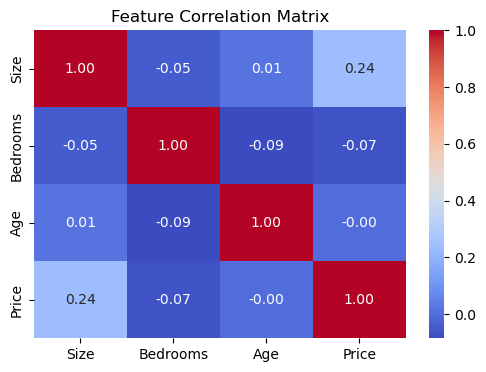

In [12]:
#Step 2 : Compute Correlation (Filter Method)
plt.figure(figsize=(6,4))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title("Feature Correlation Matrix")
plt.show()

In [16]:
#Step 3 : Apply Recursive Feature Elimination (Wrapper Method)
X = data.drop(columns = ['Price']) # Features
Y = data['Price'] #Target Variable

model = RandomForestRegressor()
rfe = RFE(model,n_features_to_select = 2) #Select top 2 Features
X_Selected = rfe.fit_transform(X,Y)

print(f"Selected Features using rfe : {X.columns[rfe.support_]}")

Selected Features using rfe : Index(['Size', 'Age'], dtype='object')


In [18]:
#Step 4 : Apply Lasso Regression
lasso = Lasso(alpha = 0.1)
lasso.fit(X,Y)
importance = np.abs(lasso.coef_)

#Display Feature Importance

selected_features = X.columns[importance > 0]
print(f"Selected Features using Lasso : {selected_features}")

#Apply Lasso Regression (Embedded Method) to eliminate irrelevant features

Selected Features using Lasso : Index(['Size', 'Bedrooms', 'Age'], dtype='object')
